## Additional Learning Resources
Refer to [scikit-learn documentation](https://scikit-learn.org/stable/) and the [Pandas user guide](https://pandas.pydata.org/docs/) for detailed explanations of the functions used in this notebook.
For a quick refresher on splitting data:
```python
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```


# Linear Regression
1. Fit a line to a series of points
2. Find the error of the line
3. Optimise the line's fit
4. Score your results

### Why is this useful?
* Predicting continous variables is commonplace in data science
* The results are easily interpretable
* A deeper dive into Linear Regression helps us to understand Logistic Regression
* Prerequisite for understanding neural nets

## How to calculate a Linear Model: Two alternatives

### 1. Closed-form solution

Analytical solution using the **Normal Equation**

### 2. Trial and error

Iterative approach, similar to the prep course.

For each iteration: 

* calculate the MSE error
* Change the parameters of the model
* Minimise the error using Gradient Descent

---

### Evaluate the solution

* R-squared = the proportion of variance explained by the line of best fit
* Varies between 0 and 1
* The higher the score, the better the model

In [1]:
import random 
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
x = np.random.randint(0, 100, size=10000)

In [3]:
pd.DataFrame(x).describe()

,0
count,10000.000000
mean,50.527900
std,29.124351
min,0.000000
25%,25.000000
50%,51.000000
75%,76.000000
max,100.000000


### y = coeff * x + bias + error

In [4]:
coeff= 2
bias = 50

y = []
for i in x:    
    error = random.gauss(0,30)
    y.append(coeff * i + bias + error)

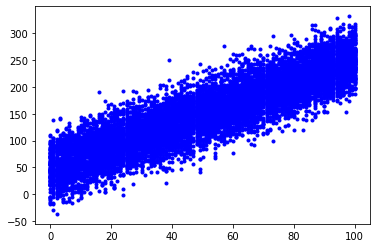

In [5]:
plt.plot(x,y, 'b.')


#### Fit a linear regression model to the data


In [6]:
m = LinearRegression()

All sklearn ML models require matrices for X data, not vectors.

* Yes: dataframes, np.reshape(-1,1), lists of lists
* No: lists, np.array(), pd.Series

In [8]:
x = pd.DataFrame(x)

In [9]:
m.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
ypred = m.predict(pd.DataFrame(x))

## Analyse the results

### R squared
* 0 = no explainability from the model's correlation.
* 1 = the model has total explainability the proportion of variance that the model explains

### MSE:

* It is very sensitve to outliers - each residual is squared, so..
* residuals greater than one have a disproportionate big effect on outliers... 
* residuals less than one have a disproportionate small effect on outliers... 

### Alternatives:

* MAE - average of the absolute residuals. (less sensitive to outliers than the MSE)
* RMSLE - root-mean squared log error (doesn't penalise over-estimates as much as underestimates)

In [11]:
m.score(pd.DataFrame(x), y)

0.7929410466979425

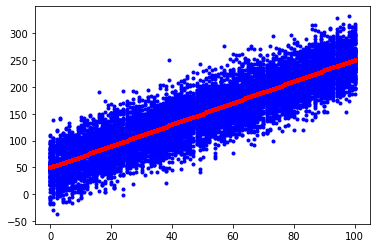

In [12]:
plt.plot(x,y, 'b.')
plt.plot(x,ypred, 'r.')

In [15]:
m.coef_, m.intercept_

(array([2.00457225]), 50.01823490335805)